In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import random
import nltk
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
users = pd.read_csv("../dataset/users.csv")
fusers= pd.read_csv("../dataset/fusers.csv")

In [3]:
users['is_fake'] = 0
fusers['is_fake'] = 1

In [4]:
users.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset', 'is_fake'],
      dtype='object')

In [5]:
fusers.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset', 'is_fake'],
      dtype='object')

In [6]:
data = pd.concat([users,fusers],ignore_index=True)

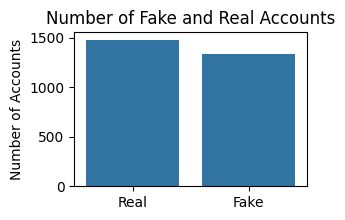

In [7]:
account_counts = data['is_fake'].value_counts()

plt.figure(figsize=(3, 2))
sns.barplot(x=["Real","Fake"], y=account_counts.values)
plt.ylabel('Number of Accounts')
plt.title('Number of Fake and Real Accounts')
plt.show()

In [8]:
columns_to_drop = ['id', 'name', 'screen_name', 'created_at', 'url', 'time_zone', 'profile_image_url', 'profile_banner_url', 'profile_background_image_url_https', 'profile_image_url_https', 'profile_sidebar_border_color', 'profile_background_image_url', 'profile_background_color', 'location','updated','profile_link_color', 'utc_offset', 'dataset','profile_background_tile','profile_text_color','profile_sidebar_border_color','profile_sidebar_fill_color','profile_use_background_image','default_profile_image']
data = data.drop(columns=columns_to_drop)

<Figure size 600x300 with 0 Axes>

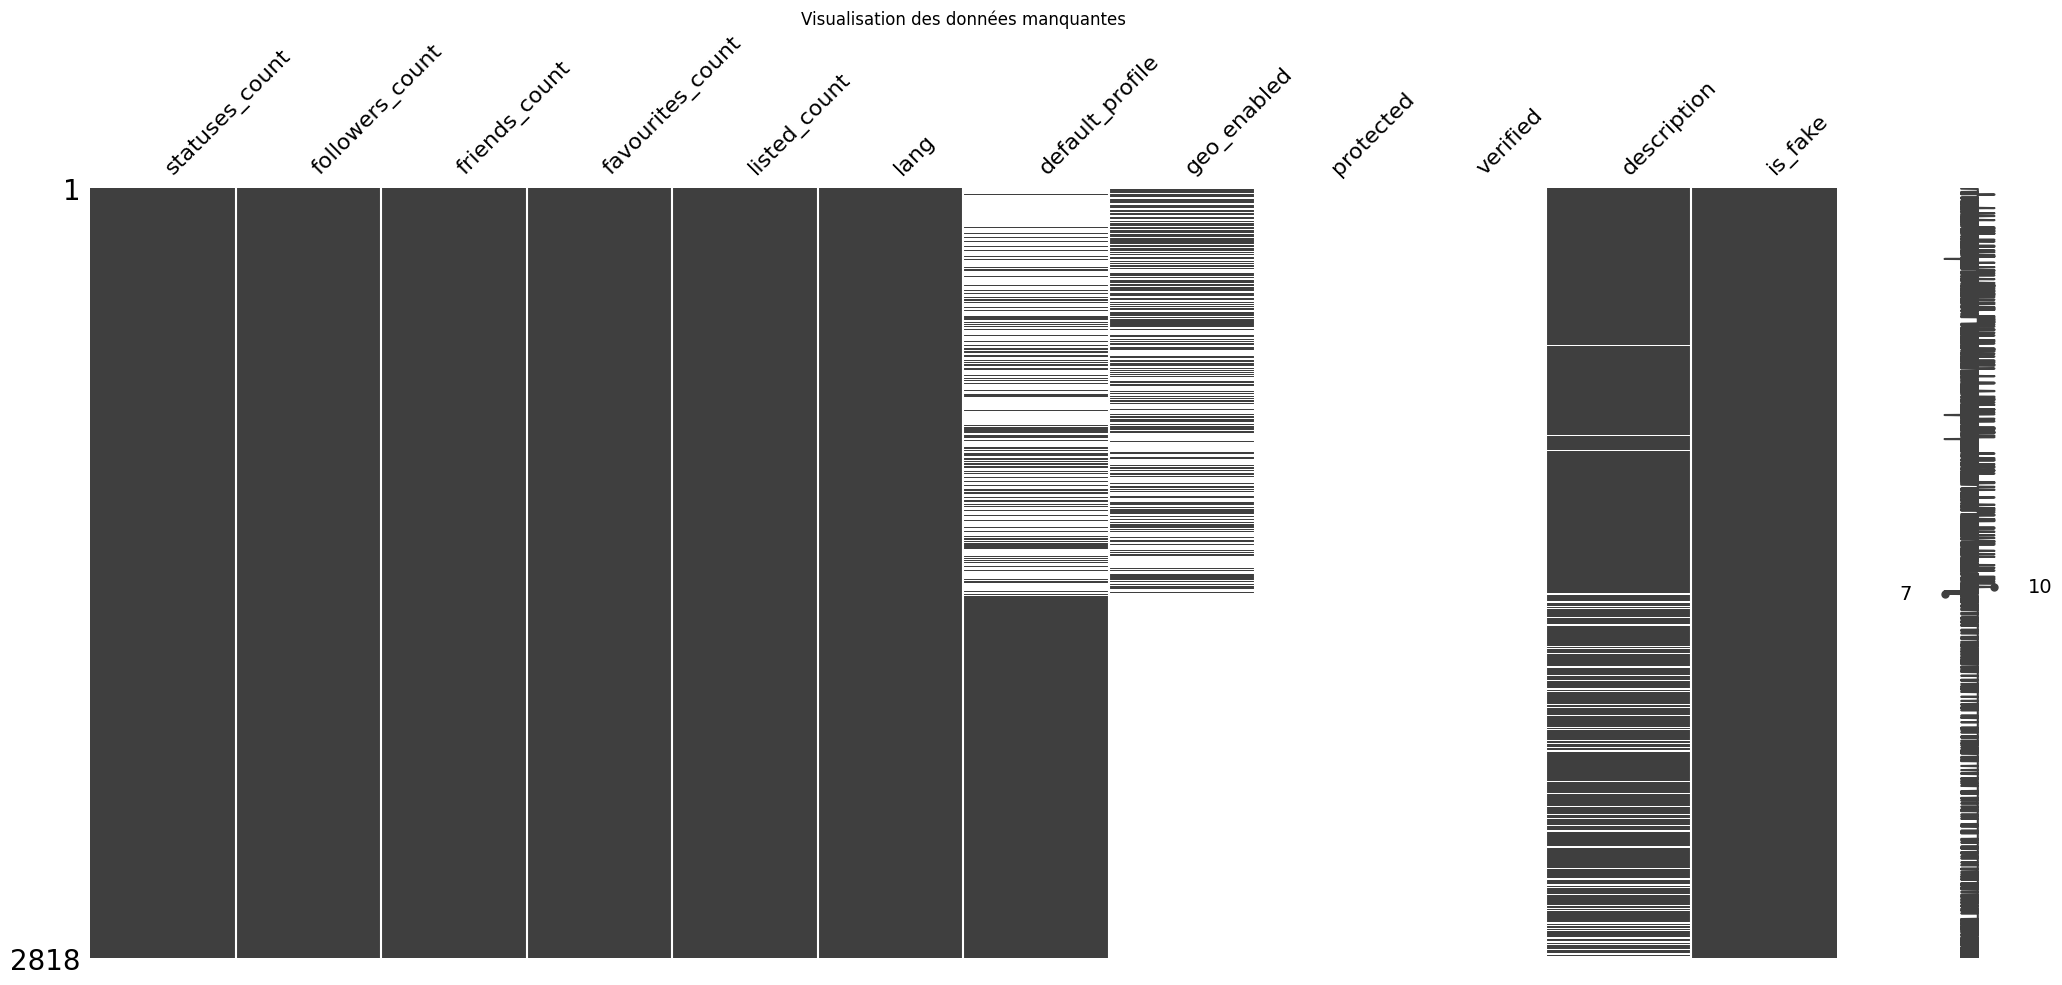

In [9]:
import missingno as msno
plt.figure(figsize=(6, 3))
msno.matrix(data)
plt.title('Visualisation des données manquantes')
plt.show()

In [10]:
data['default_profile'] = data['default_profile'].fillna(0) 

In [11]:
data['geo_enabled'] = data['geo_enabled'].fillna(0)

In [12]:
data = data.drop(columns=['verified', 'protected'])

<Figure size 600x300 with 0 Axes>

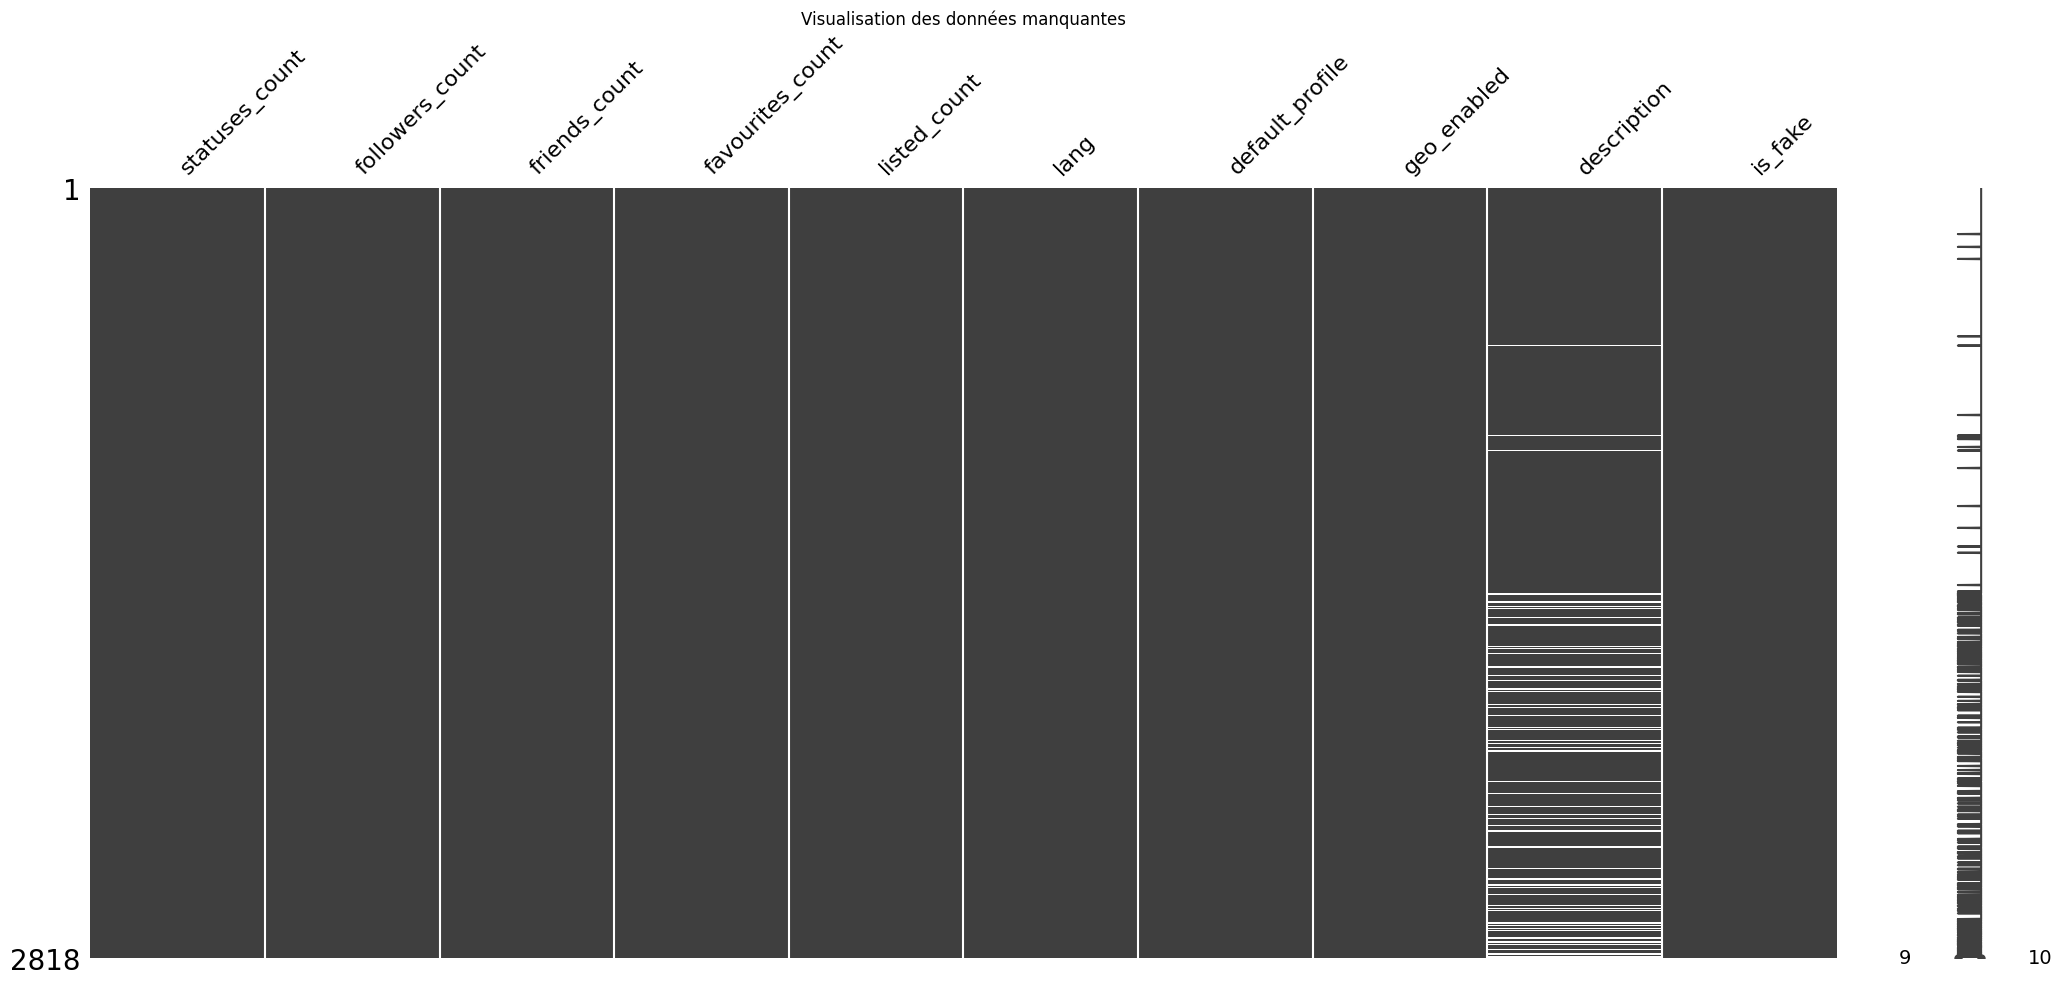

In [13]:
import missingno as msno
plt.figure(figsize=(6, 3))
msno.matrix(data)
plt.title('Visualisation des données manquantes')
plt.show()

In [14]:
blank_percentage = data['description'].isna().mean() * 100
non_blank_percentage = 100 - blank_percentage
fig = px.pie(
    names=['Blank', 'Non-Blank'],
    values=[blank_percentage, non_blank_percentage],
    title='Percentage of Blank Cells in Description'
)
fig.show()

In [15]:
lang_counts = data['lang'].value_counts().reset_index()
lang_counts.columns = ['Language', 'Count']
fig5 = px.bar(lang_counts, x='Language', y='Count', 
              title='Distribution of Languages', labels={'Language': 'Language', 'Count': 'Count'})
fig5.show()

In [16]:
import plotly.graph_objects as go

# Create box plots for each metric
fig_combined = go.Figure()

fig_combined.add_trace(go.Box(
    y=data['followers_count'],
    x=data['is_fake'],
    name='Followers Count',
    marker_color='blue'
))

fig_combined.add_trace(go.Box(
    y=data['friends_count'],
    x=data['is_fake'],
    name='Friends Count',
    marker_color='green'
))

fig_combined.add_trace(go.Box(
    y=data['statuses_count'],
    x=data['is_fake'],
    name='Statuses Count',
    marker_color='purple'
))

# Update layout
fig_combined.update_layout(
    title='Distribution of Followers, Friends, and Statuses Count by Fake/Real Users',
    xaxis_title='Is Fake',
    yaxis_title='Count',
    boxmode='group'
)

fig_combined.show()

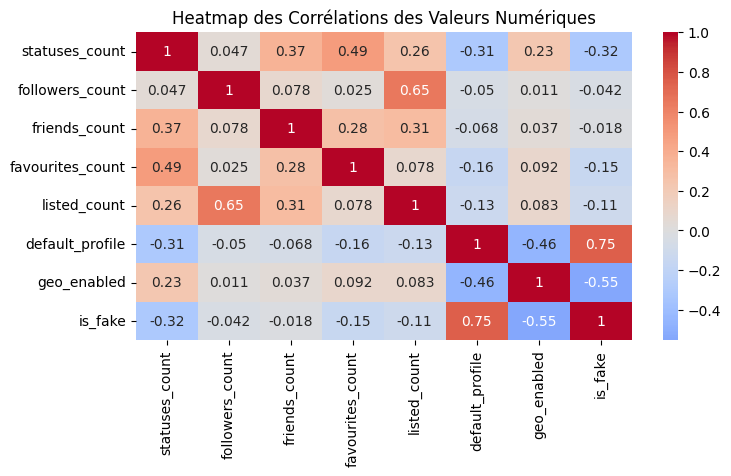

In [17]:
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap des Corrélations des Valeurs Numériques')
plt.show()

In [42]:
def insert_random_words(text, n_inserts=2):
    words = text.split()
    word_list = list(wordnet.words())
    for _ in range(n_inserts):
        random_word = random.choice(word_list)
        insert_position = random.randint(0, len(words))
        words.insert(insert_position, random_word)
    return ' '.join(words)

# Calculate the difference in counts between real and fake users
real_count = data[data['is_fake'] == 0].shape[0]
fake_count = data[data['is_fake'] == 1].shape[0]
difference = abs(real_count - fake_count)

# Augment the descriptions of the minority class
if real_count > fake_count:
    minority_class = data[data['is_fake'] == 1]
else:
    minority_class = data[data['is_fake'] == 0]

augmented_rows = []
for i in range(difference):
    row = minority_class.sample(n=1).iloc[0]
    row['description'] = row['description'] if pd.notna(row['description']) else ''
    row['description_aug'] = insert_random_words(row['description'], n_inserts=2)
    augmented_rows.append(row)

# Create a new dataframe with the augmented rows
augmented_df = pd.DataFrame(augmented_rows)
augmented_df

# Concatenate the original dataframe with the augmented dataframe
balanced_data = pd.concat([data, augmented_df.drop(columns=['description_aug'])], ignore_index=True)

balanced_data

,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,default_profile,geo_enabled,description,is_fake
0,20370,5470,2385,145,52,it,0.0,0.0,Founder of http://www.screenweek.it & http://w...,0
1,3131,506,381,9,40,en,0.0,0.0,BSc degree (cum laude) in Computer Engineering...,0
2,4024,264,87,323,16,en,0.0,0.0,Cogito ergo bestemmio.,0
3,40586,640,622,1118,32,en,0.0,1.0,"Se la vita ti dà sarde, scapocciale!",0
4,2016,62,64,13,0,it,0.0,1.0,Je me souviens,0
...,...,...,...,...,...,...,...,...,...,...
2957,30,17,355,0,0,en,1.0,0.0,,1
2958,1378,48,1998,1108,0,en,1.0,0.0,,1
2959,24,15,235,0,0,en,1.0,0.0,Everything ou include GOD in you will be BLESS...,1
2960,36,18,286,0,0,en,1.0,0.0,Começa asim: como mça do tempo e logo vira apr...,1


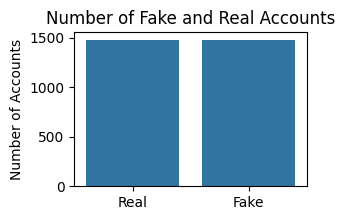

In [43]:
account_counts = balanced_data['is_fake'].value_counts()

plt.figure(figsize=(3, 2))
sns.barplot(x=["Real","Fake"], y=account_counts.values)
plt.ylabel('Number of Accounts')
plt.title('Number of Fake and Real Accounts')
plt.show()